In [1]:
# Project_glass
!git clone https://github.com/Mike030668/Project_glass.git -q
# Genetic_generation_net
!git clone https://github.com/Mike030668/Genetic_generation_net.git -q
# установка библиотека контроля  времени
!pip install stopit -q


  Preparing metadata (setup.py) ... done


# imports

In [2]:
import sys
dir_glass = '/content/Project_glass'
dir_gen = '/content/Genetic_generation_net'
sys.path.append(dir_gen)
sys.path.append(dir_glass)

# Project_glass
from prepare_data.constants import PREDICT_LAG, BATCH_SIZE

# Genetic_generation_net
from genetic.process_with_generator import selection

import numpy as np # библиотека нампи
import matplotlib.pyplot as plt # библиотека матплотлиб для отрисовки
from IPython.display import clear_output # очистка вывода в ячейке
import joblib
#import pandas as pd      # библиотека пандас
import tensorflow as tf # библиотека машинного обучения

# load prepared train data

data prepared with vcs note makedata_vsc.ipynb

In [3]:
x_train_sc = np.load(dir_glass + "/predtrend/x_train_sc.npy")
x_val_sc = np.load(dir_glass + "/predtrend/x_val_sc.npy")
y_train_sc = np.load(dir_glass + "/predtrend/y_train_sc.npy")
y_val_sc = np.load(dir_glass + "/predtrend/y_val_sc.npy")
INSHAPE = x_val_sc.shape[1:]

# Генетический отбор нейронок

In [5]:
# ВЕРСИЯ КОДА С ПОСЕВОМ и генетикой в создании новых популяций

# оптимизатор
optimizer = tf.keras.optimizers.Adam
# функция потерь
loss = tf.keras.losses.Huber()

# Сохраняем массивы лучших моделей на диск
# [[[bot_pop_1],[blockov_list_1],[bot_1]],[[bot_pop_1],[blockov_list_1],[bot_1]]]
directory = '/content/drive/Othercomputers/My_comp/Документы/Note_books/Тестовые работы/Alex_Glass/Project_glass/gen_trend_models/'  # куда  пишет данные этот код

########### посев сетей вначале кода ############################################
# posev = []
# смотри пояснения выше как передать сюда ранее созданные данные
posev = np.load(directory +'bestnets.npy', allow_pickle = True)
# если еще нет список моделий, то ввести 0
# или можно вручную списки подать, указав вместо 0, сколько будкт сетей
# последовательно в ответ ввести  листы [bot_pop], [blockov_list], [bot]

# в текстовой ячейке ниже есть 2 сети для посева вручную

########### для подсевания лучших сетей прошлых эпох ###########################
waitnets = 3   # сколько выводим лучших для для изучения и посева
dw = 0.4       # доля лучших с прошлых эпох для подсева
frbest = 2     # как часто подсевыем лучших с прошлых эпох

########### папаметпы для генерируемых сетей ###################################
activ_lays =['relu', 'elu', 'tanh', 'sigmoid', 'selu', 'softmax',
             'softplus', 'softsign', 'hard_sigmoid', 'exponential']

# нужное количество входных нейроной
neiro_out = PREDICT_LAG

# функции активации для выходного слоя
activ_out = ['tanh']
# словарь типов сетей
style_net = {0: 'Dense',
             1: 'Conv',
             #2: 'Recur', # На малом ОЗУ лучше закомитить
            # None: 'MIX'
}
################################################################################
q_tyblocks = 7    # макс количество генерируемых блоков для сети
q_lays = 7        # макс количество слоев в блоках
################################################################################
verbouse = 0      # отображать ли обучение
epohs = 7         # Количество эпох для генетического поиска моделей
test_eph = 4      # Количество эпох тестового обучения моделей
################################################################################
n = 7             # количество ботов популяции
p = 8             # количество популяций

dn = 0.3          # доля выживших ботов
dp = 0.3          # доля выживших популяций

dneff = 0.1       # доля выживших ботов по эффективности
dpeff = 0.1       # доля выживших популяций по эффективности

prb_randbot = 0.3 # вероятность появления случайного бота в новой популяции
mutp = 0.4        # Коэфициент мутаций при создании мегабота новой популяции
mutn = 0.45       # Коэфициент мутаций при создании бота новой сети в популяции

dpsurv = 0.8      # доля от выживших ботов популяции используемыех в родителях
dnsurv = 0.8      # доля от выживших ботов мегапопуляции используемыех в родителях

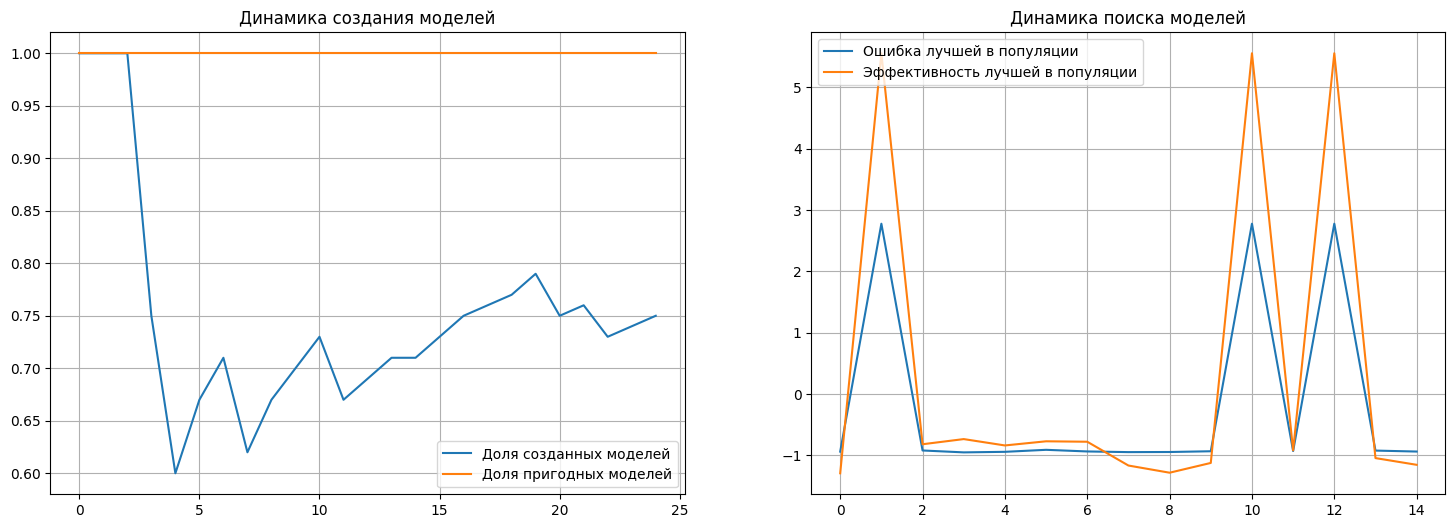

In [ ]:
selection(
        directory = directory,          # сколько выводим лучших для для изучения и посева
        waitnets = waitnets,            # сколько ожидаем лучших сетей
        dw = dw,                        # доля лучших с прошлых эпох для подсева
        frbest = frbest,                # как часто подсевыем лучших с прошлых эпох
        inshape = INSHAPE,              # размер входных данных
        predit_lag = PREDICT_LAG,       # размер предсказываемых данных
        type_data = "numpy",            # метка, что тренируем на генераторе данных
        train_data = [x_train_sc, y_train_sc],   # генератор данных для обучения
        val_data= [x_val_sc, y_val_sc],          # генератор данных для валидации
        activ_lays = activ_lays,        # спиисок активационных функций из keras для внутреннмх слоев
        neiro_out = neiro_out,          # нейронов в выходнос слое, соответствует PREDICT_LAG
        activ_out = activ_out,          # спиисок активационных функций из keras для выходного слоя
        style_net = style_net,          # среди каких сетей ищем
        q_tyblocks = q_tyblocks,        # макс количество генерируемых блоков для сети
        q_lays = q_lays,                # макс количество слоев в блоках
        verbouse = verbouse,            # отображать ли тестовое обучение внутри генетики
        epohs = epohs,                  # Количество эпох для генетического поиска моделей
        test_eph = test_eph,            # Количество эпох тестового обучения моделей
        optimizer = optimizer,          # оптимизатор  пока беруться внутри генетики без выбора
        loss = loss,                    # функция потерь пока беруться внутри генетики без выбора
        n = n,                          # количество ботов популяции
        p = p,                          # количество популяций
        dn = dn,                        # доля выживших ботов
        dp = dp,                        # доля выживших популяций
        dneff = dneff,                  # доля выживших ботов по эффективности
        dpeff = dpeff,                  # доля выживших популяций по эффективности
        prb_randbot = prb_randbot,      # вероятность появления случайного бота в новой популяции
        mutp = mutp,                    # Коэфициент мутаций при создании мегабота новой популяции
        mutn = mutn,                    # Коэфициент мутаций при создании бота новой сети в популяции
        dpsurv = dpsurv,                # доля от выживших ботов популяции используемыех в родителях
        dnsurv = dnsurv,                # доля от выживших ботов мегапопуляции используемыех в родителях
        posev = posev,                  # список ранее найденых генетикой сетей для продолжения поиска
        # нужно если check_aotocorr = True
        x_val = [],                     # x валидационныые данные
        y_val = [],                     # y валидационныые данные
        make_log = False,               # применяолсь логорифмирование для y
        y_scaler = None,                # обученный скейлер для y для теста в лоссе
        check_aotocorr = False          # используем ли лосс автокорреляции в ошибке общей при отборе сетей генетикой
)